## Data Preparation to forecast the number of intake for WoodGreen Community

### In this file there is: data extraction, data cleaning, data transformation, data encoding, data normalization, data visualization, etc.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Load and Inspect columns from WoodGreen datasets

In [3]:
# Define the file path 
file_path = "../../woodgreen-data/WoodGreen_All_Systems.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display basic information about the DataFrame
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

# Print all column names
columns_list = df.columns.tolist()
print("\n--- COLUMN NAMES ---")
for col in columns_list:
    print(col)

/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/1572946015.py:5: DtypeWarning: Columns (0,3,4,9,12,15,16,21,22,26,27,31,33,34,40,41,42,43,46,47,48,49,50,51,52,54,55,56,57,58,59,61,62,63,64,65,66,67,69,73,74,75,76,77,78,79,81,82,84,85,86,87,88,90,91,92,93,94,95,96,97,98,99,100,101,102,104,106,107,111,113,114,115,117,126,127,133,135,137,144,146,148,149,152,153,154,155,157,158,159,160,162,164,165,166,167,168,171,172,173,174,175,176,178,179,180,181,182,183,184,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Total rows: 149557
Total columns: 188

--- COLUMN NAMES ---
Unique Record ID
Surname
First Given Name
Sex
Marital Status
Birth Date (YYMMDD)
Year of Birth
Month of Birth
Day of Birth
Birth Province / Country Code
Social Insurance Number
Provincial Health Insurance Number
Home Province Code
Home Address
Home Address Postal Code
Creation Date
Last Modified
System Registration
emailaddress1_DC
statecode_DC
mir_primary_phone_DC
modifiedon_DC
employmentstatus_DC
mir_workwithanyemployer_DC
mir_looking_for_work_DC
crmd_canadianexperience_DC
work_experience_DC
years_of_work_experience_DC
mir_minimum_one_year_experience_DC
mir_history_of_poor_work_retention_DC
mir_labor_market_change_DC
time_out_of_school_work_training_DC
mir_internationallytrainedprofessionals_DC
internationallytrainedtype_DC
primaryincomesource_DC
mir_lowincome_DC
mir_individual_monthly_income_after_tax_DC
mir_family_income_per_year_after_tax_DC
mir_low_income_cut_off_licos_after_tax_DC
statuscode_DC
program_startdate_DC
prog

### View the list of the program

In [4]:
print("Program_CU Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['Program_CU'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['Program_CU'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs) 

Program_CU Analysis:

Non-null count: 37245

Number of unique programs: 70

Sample unique program names:
['SIL' 'Developmental Services' 'APSW' 'APSW Housing'
 'Counselling and Support Services' 'Albany Drop-In Clinic - CSS'
 'CSS ï¿½ Gerstein' 'CSS ï¿½ SCOPE' 'Case Management' 'Counselling'
 'Social Work Drop-In Clinic - CSS' 'Homelessness & Housing help'
 'Crisis Services' 'Behaviour Support' 'Street to Home'
 'Transitional Care Coordination'
 'Transitional Care Coordination - Senior' 'Walk-In Counseling'
 'First Step to Home' 'First Step to Home - Follow Up' 'Full Circle'
 'Full Circle - Seniors Crisis' 'Social Work - Cluster'
 'Social Work Drop-In Clinic - FC' 'Social Work - Seniors Crisis'
 'Social Work Drop-In Clinic - SW' 'Social Work'
 'Albany Drop-In Clinic - SW' 'Social Work - Slaight'
 'Social Work - Group' 'Social Work Drop-In Clinic - Slaight' 'Oakridge'
 'Caregiver Support' 'High Intensity Supports (Caregiver Support)'
 'Caregiver Support ï¿½ Info and Referrals' 'Caregive

In [5]:
print("program_name_DC Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['program_name_DC'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['program_name_DC'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs) 

program_name_DC Analysis:

Non-null count: 41573

Number of unique programs: 37

Sample unique program names:
['Tax Clinic' 'Family Newcomer Services' 'Family Finance Clinic'
 'Financial Empowerment Counselling' 'Employment Ontario'
 'Financial Empowerment Library Project'
 'Community Connections - Group Activities'
 'Newcomer Settlement and Integration Services (Newcomer Services Program)'
 'NSP Youth Program' 'Newcomer Community Integration Program (NCIP)'
 'Visual Effects Compositing Program' 'Asylum Integration Program (AIP)'
 'Enhanced Language Training' 'Youth Wellness Centre'
 'Youth Housing Navigation and Subsidy Support Program'
 'Youth Job Connections Summer (YJC Summer)' 'Newcomer Youth Service'
 'Community Connections - Mentorship' 'Rites of Passage'
 'Youth Job Connections (YJC)' 'Employment Accessibility Services'
 'Newcomer Womenâ€™s Entrepreneurship Program' 'Older Worker Initiative'
 'Personalized Career Accelerator (PCA)'
 'Industrial Millwright Pre-Apprenticeship Pro

In [6]:
print("Program Name_TR Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['Program Name_TR'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['Program Name_TR'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs) 

Program Name_TR Analysis:

Non-null count: 16567

Number of unique programs: 56

Sample unique program names:
['Community Counselling'
 'Service Coordination - Ministry of Health Child Youth Mental Health Programs'
 'Project Going Home' 'TAP' 'Live-In Youth Justice - Everett'
 'Live-In Treatment - Woodycrest' 'Shelter'
 'YJ Treatment Residential - Logan' 'Transitional Housing - Redwood'
 'Live-In Treatment - Withrow' 'Jarvis Collegiate' 'CONNECTS Programming'
 'Live-In Treatment - Clifton' 'Youth Mental Health Court Worker'
 'Youth in Transition' 'YJ Mental Health Access' 'PATH - Programming'
 'Education and Community Partnership Program - Wexford'
 'PATH - Counselling' 'Intake - Child Youth Mental Health Programs'
 'Keeping Families Together' 'Youth Justice Counselling'
 'CAST Healthy Teens' 'Live-In Treatment Counselling'
 'Education and Community Partnership Program - Everett'
 "What's Up Walk-In"
 'Community Counselling - Specialized Consultation/Assessment'
 'Intensive Services - 

In [7]:
print("RequestProgram_ID_HB Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['RequestProgram_ID_HB'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['RequestProgram_ID_HB'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs) 

RequestProgram_ID_HB Analysis:

Non-null count: 1959

Number of unique programs: 1

Sample unique program names:
[27.]


In [8]:
print("Department Name_AC Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['Department Name_AC'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['Department Name_AC'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs) 

Department Name_AC Analysis:

Non-null count: 18019

Number of unique programs: 18

Sample unique program names:
['SALC' 'MW' 'ALS' 'HAL' 'RPOC' 'TR' 'CC' 'ADP - West' 'EY MOW'
 'ADP - East' 'EY SALC' 'HMNS' 'HS' 'RC' 'HMM' 'RCAP' 'RCAPH' 'SH']


In [9]:
print("System_CU Analysis:")
# Check how many non-null entries exist
print("\nNon-null count:", df['System_CU'].notna().sum())

# Get a list of unique program names (to understand what's inside)
unique_programs = df['System_CU'].dropna().unique()
print("\nNumber of unique programs:", len(unique_programs))

# Print first few unique names
print("\nSample unique program names:")
print(unique_programs)

System_CU Analysis:

Non-null count: 37245

Number of unique programs: 2

Sample unique program names:
['CCU' 'COSS']


In [10]:
mental_health_programs = [
    'Counselling and Support Services',
    'Counselling',
    'Walk-In Counseling',
    'Crisis Services',
    'Behaviour Support',
    'Full Circle',
    'Full Circle - Seniors Crisis',
    'Social Work',
    'Social Work - Cluster',
    'Social Work - Seniors Crisis',
    'Social Work - Group',
    'Social Work - Slaight',
    'Social Work Drop-In Clinic - CSS',
    'Social Work Drop-In Clinic - SW',
    'Social Work Drop-In Clinic - FC',
    'Social Work Drop-In Clinic - Slaight',
    'Albany Drop-In Clinic - CSS',
    'Albany Drop-In Clinic - SW',
    'CAMH- Psychotherapy',
    'Trauma & Spiritual Care',
    'Behaviour Supports Ontario',
    'CSS - Gerstein',
    'CSS - SCOPE'
]

community_health_programs = [
    'Community Support Services - West',
    'Comprehensive Care & Integration Specialist Team',
    'Health Access Taylor Massey',
    'Taylor-Massey (CCIST)',
    'Supportive Housing - West',
    'Housing Service - West',
    'Homelessness & Housing help',
    'Caregiver Support',
    'High Intensity Supports (Caregiver Support)',
    'Caregiver Support - Info and Referrals',
    'Caregiver Support - Group',
    'Toronto Seniors Helpline',
    'COSS East Primary Care',
    'COSS East Behaviour Support',
    'COSS East TCCS',
    'COSS North',
    'COSS West',
    'COSS North primary care',
    'COSS Respite Unit',
    'LOFT COSS A-Central',
    'LOFT COSS A-Central East',
    'LOFT COSS B-Central',
    'LOFT COSS B-Central East',
    'Assess and Restore',
    'Nutritional Programming - West',
    'Bed bug and hoarding assistance - West',
    'Transitional Care Coordination',
    'Transitional Care Coordination - Senior',
    'MGH2Home',
    'RCAP',
    'Homes For Good',
    'Cedarvale',
    'St. Hilda'
]

# Combine both lists
health_related_CU = mental_health_programs + community_health_programs

# Filter
df_CU_health = df[df['Program_CU'].isin(health_related_CU)].copy()

print("Health-related Program_CU Analysis:")

print("Filtered dataset size:", df_CU_health.shape)

for col in ['Creation Date','Last Modified','Client Date Enrolled_AC','Client Intake Date_AC', 'program_startdate_DC', 'Start Date_AC',
            'Service Start Date_CC', 'RG_date_HB', 'DischargeDateY-M-D_TR']:
    print(col, ":", df_CU_health[col].notna().sum(), "valid dates")

# Convert to datetime safely
df_CU_health['Creation Date'] = pd.to_datetime(df_CU_health['Creation Date'], errors='coerce')

# Keep only rows with valid (non-null) dates
df_CU_health_valid = df_CU_health[df_CU_health['Creation Date'].notna()].copy()

# Inspect results
print("Filtered dataset size:", df_CU_health_valid.shape)
print("Earliest Creation Date:", df_CU_health_valid['Creation Date'].min())
print("Latest Creation Date:", df_CU_health_valid['Creation Date'].max())

# Optional: check how many were dropped
dropped = df_CU_health.shape[0] - df_CU_health_valid.shape[0]
print(f"Rows dropped due to invalid Creation Date: {dropped}")

Health-related Program_CU Analysis:
Filtered dataset size: (35135, 188)
Creation Date : 35087 valid dates
Last Modified : 0 valid dates
Client Date Enrolled_AC : 0 valid dates
Client Intake Date_AC : 0 valid dates
program_startdate_DC : 0 valid dates
Start Date_AC : 0 valid dates
Service Start Date_CC : 0 valid dates
RG_date_HB : 0 valid dates
DischargeDateY-M-D_TR : 0 valid dates
Filtered dataset size: (35087, 188)
Earliest Creation Date: 1900-01-01 00:00:00
Latest Creation Date: 2025-08-25 00:00:00
Rows dropped due to invalid Creation Date: 48


In [13]:
mental_health_programs_TR = [
    'Community Counselling',
    'Youth Mental Health Court Worker',
    'YJ Mental Health Access',
    "What's Up Walk-In",
    "What's Up Walk-In - Service Coordination",
    'PATH - Counselling',
    'Live-In Treatment Counselling',
    'CAST Healthy Teens',
    'CAST Healthy Teens - Family',
    'PATH - SNAP YJ Males',
    'PATH - SNAP YJ Females',
    'PATH - Substance Use',
    'Intensive In-Home',
    'Intensive In-Home - Building Bridges',
    'Intensive Services - Specialized Consultation/Assessment (MCYS funded)',
    'Community Counselling - Specialized Consultation/Assessment',
    'Service Coordination - Ministry of Health Child Youth Mental Health Programs',
    'PATH - TAPP-C',
    'PATH - Music'
]

community_health_programs_TR = [
    'Youth in Transition',
    'Keeping Families Together',
    'Project Going Home',
    'Service Coordination Migrated',
    'Intake - Community - Transitional',
    'Intake - Community - Youth Justice',
    'PATH - Employment Supports',
    'PATH - Education Supports',
    'Education and Community Partnership Program - Wexford',
    'Education and Community Partnership Program - Wexford - Counselling',
    'Education and Community Partnership Program - Everett',
    'Education and Community Partnership Program - Redwood',
    'Jarvis Collegiate',
    'CONNECTS Programming',
    'CONNECTS Counselling',
    'Pathfinder',
    'TAP'
]

# Combine both categories
health_related_TR = mental_health_programs_TR + community_health_programs_TR

# Filter
df_TR_health = df[df['Program Name_TR'].isin(health_related_TR)].copy()

print("TR Health Related Programs Analysis:")

print("Filtered dataset size:", df_TR_health.shape)

# Optional: check valid date columns again
date_columns = [
    'Client Intake Date_AC',
    'program_startdate_DC',
    'Start Date_AC',
    'Service Start Date_CC',
    'RG_date_HB',
    'DischargeDateY-M-D_TR'
]

for col in date_columns:
    valid_count = df_TR_health[col].notna().sum()
    print(f"{col}: {valid_count} valid dates")


# Convert to datetime safely
df_TR_health['DischargeDateY-M-D_TR'] = pd.to_datetime(df_TR_health['DischargeDateY-M-D_TR'], errors='coerce')

# Keep only rows with valid (non-null) dates
df_TR_health_valid = df_TR_health[df_TR_health['DischargeDateY-M-D_TR'].notna()].copy()

# Inspect results
print("Filtered dataset size:", df_TR_health_valid.shape)
print("Earliest Discharge Date:", df_TR_health_valid['DischargeDateY-M-D_TR'].min())
print("Latest Discharge Date:", df_TR_health_valid['DischargeDateY-M-D_TR'].max())

# Optional: check how many were dropped
dropped = df_TR_health.shape[0] - df_TR_health_valid.shape[0]
print(f"Rows dropped due to invalid Discharge Date: {dropped}")

TR Health Related Programs Analysis:
Filtered dataset size: (11178, 188)
Client Intake Date_AC: 0 valid dates
program_startdate_DC: 0 valid dates
Start Date_AC: 0 valid dates
Service Start Date_CC: 0 valid dates
RG_date_HB: 0 valid dates
DischargeDateY-M-D_TR: 10915 valid dates
Filtered dataset size: (10915, 188)
Earliest Discharge Date: 2005-03-11 00:00:00
Latest Discharge Date: 2025-07-18 00:00:00
Rows dropped due to invalid Discharge Date: 263


In [18]:
# Define the relevant programs
mental_health_programs_DC = [
    'Youth Wellness Centre',
    'Rites of Passage',
    'Community Connections - Group Activities',
    'Community Connections - Mentorship',
    'Intensive Case Management for Youth (ICM)'
]

# Filter dataset
df_DC_health = df[df['program_name_DC'].isin(mental_health_programs_DC)].copy()

print("DC Mental Health Programs Analysis:")
# Check how many records remain
print("Filtered dataset size:", df_DC_health.shape)

# Optional: check valid date columns again
date_columns = [
    'Client Intake Date_AC',
    'program_startdate_DC',
    'Start Date_AC',
    'Service Start Date_CC',
    'RG_date_HB',
    'DischargeDateY-M-D_TR'
]

for col in date_columns:
    valid_count = df_DC_health[col].notna().sum()
    print(f"{col}: {valid_count} valid dates")

# Inspect results
print("Filtered dataset size:", df_DC_health.shape)
print("Earliest Discharge Date:", df_DC_health['program_startdate_DC'].min())
print("Latest Discharge Date:", df_DC_health['program_startdate_DC'].max())


DC Mental Health Programs Analysis:
Filtered dataset size: (1209, 188)
Client Intake Date_AC: 0 valid dates
program_startdate_DC: 1209 valid dates
Start Date_AC: 0 valid dates
Service Start Date_CC: 0 valid dates
RG_date_HB: 0 valid dates
DischargeDateY-M-D_TR: 0 valid dates
Filtered dataset size: (1209, 188)
Earliest Discharge Date: 2024-07-15
Latest Discharge Date: 2025-10-17


In [20]:
# Save dataframe to CSV
df_CU_health_valid.to_csv('../data/community-mental-health/preprocess_CU_health.csv', index=False)
df_TR_health_valid.to_csv('../data/community-mental-health/preprocess_TR_health.csv', index=False)
df_DC_health.to_csv('../data/community-mental-health/preprocess_DC_health.csv', index=False)

In [21]:
print(len(df_CU_health_valid)) # filter by Creation Date  
print(len(df_TR_health_valid)) # filter by Discharge Date 
print(len(df_DC_health)) # filter by Program Start Date 

35087
10915
1209


# Data Preparation for CU Health 

### Data Cleaning

In [22]:
# Drop exact duplicates (same row repeated)
df_CU_health_valid.drop_duplicates(inplace=True)

# Strip whitespace from column names and strings
df_CU_health_valid.columns = df_CU_health_valid.columns.str.strip()
df_CU_health_valid = df_CU_health_valid.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

# Handle missing values (example: fill or drop)
missing_summary = df_CU_health_valid.isna().sum().sort_values(ascending=False)
print(missing_summary.head(20))


/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/2324736985.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_CU_health_valid = df_CU_health_valid.applymap(


Wheelchair_YD                     16874
Scooter_YD                        16874
Fire & Ambulance Assistance_YD    16874
Newcommer_YD                      16874
Status in Canada_YD               16874
Car Model_YD                      16874
Parking Spot Number_YD            16874
Property Name_YD                  16874
Property Notes_YD                 16874
Client_ID_Old_HB                  16874
CP_ID_HB                          16874
pStatus_HB                        16874
Status_HB                         16874
IntakeStatus_HB                   16874
homelessflag_HB                   16874
C_Gender_HB                       16874
RequestProgram_ID_HB              16874
Accessibility Requirements_YD     16874
Walker_YD                         16874
CohortGroup_HB                    16874
dtype: int64


### Data Transformation

In [23]:
df_CU_health_valid['year'] = df_CU_health_valid['Creation Date'].dt.year
df_CU_health_valid['month'] = df_CU_health_valid['Creation Date'].dt.month


### Data Encoding

In [24]:
categorical_cols = df_CU_health_valid.select_dtypes('object').columns

df_encoded = pd.get_dummies(df_CU_health_valid, columns=['Program_CU', 'City_CU'], drop_first=True)


### Data Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df_CU_health_valid.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_CU_health_valid[numeric_cols] = scaler.fit_transform(df_CU_health_valid[numeric_cols])


/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


### Outlier Detection

In [26]:
Q1 = df_CU_health_valid[numeric_cols].quantile(0.25)
Q3 = df_CU_health_valid[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_CU_health_valid[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df_CU_health_valid[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:")
print(outliers)


Outliers per column:
Year of Birth                    936
Birth Province / Country Code      0
Home Province Code                 0
Last Modified                      0
statecode_DC                       0
                                ... 
ClientAddressCity_TR               0
Citizenship_TR                     0
Program Name_TR                    0
DischargeDateY-M-D_TR              0
Encounter Status_TR                0
Length: 129, dtype: int64


In [27]:
df_outliers = df_CU_health_valid[
    (df_CU_health_valid['Year of Birth'] < Q1['Year of Birth'] - 1.5*IQR['Year of Birth']) |
    (df_CU_health_valid['Year of Birth'] > Q3['Year of Birth'] + 1.5*IQR['Year of Birth'])
]
print(df_outliers[['Year of Birth']].head(20))


       Year of Birth
96402       0.006667
96420       0.653333
96430       0.693333
96513       0.006667
96514       0.006667
96525       0.666667
96533       0.806667
96540       0.653333
96541       0.653333
96606       0.006667
96644       0.660000
97116       0.660000
97137       0.006667
97174       0.653333
97202       0.673333
97228       0.006667
97233       0.673333
97234       0.686667
97264       0.660000
97273       0.653333


### Remove the outlier

In [ ]:
df_CU_health_valid = df_CU_health_valid[
    ~((df_CU_health_valid['Year of Birth'] < Q1['Year of Birth'] - 1.5*IQR['Year of Birth']) |
      (df_CU_health_valid['Year of Birth'] > Q3['Year of Birth'] + 1.5*IQR['Year of Birth']))
]

In [29]:
print(len(df_CU_health_valid))

15938


### Group client by year

In [30]:
df_CU_health_valid['Creation Date'] = pd.to_datetime(df_CU_health_valid['Creation Date'], errors='coerce')

df_CU_health_valid['Creation_Year'] = df_CU_health_valid['Creation Date'].dt.year

clients_per_year = df_CU_health_valid['Creation_Year'].value_counts().sort_index()
print(clients_per_year)

Creation_Year
1900       1
1990       4
1991       2
1992       1
1994       5
1995      10
1997       4
1998       5
1999       4
2000       4
2001       2
2002       3
2003       8
2004      10
2005       6
2006      12
2007       8
2008       7
2009      36
2010      73
2011      59
2012      61
2013     115
2014     211
2015     346
2016     620
2017    1474
2018    1247
2019    1504
2020    1340
2021    1519
2022    1919
2023    2113
2024    1978
2025    1227
Name: count, dtype: int64


/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/787454558.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_CU_health_valid['Creation_Year'] = df_CU_health_valid['Creation Date'].dt.year


### Visualize how many clients per year

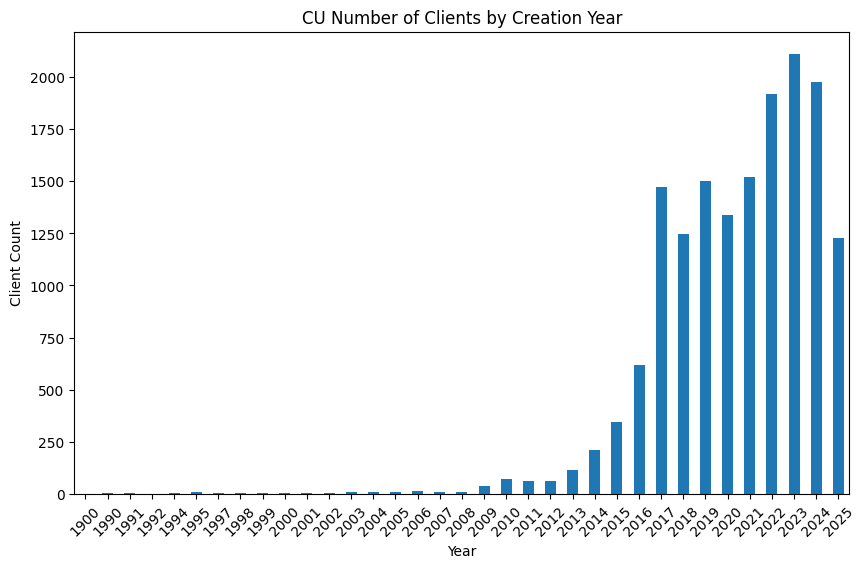

In [31]:
clients_per_year.plot(kind='bar', figsize=(10,6))
plt.title('CU Number of Clients by Creation Year')
plt.xlabel('Year')
plt.ylabel('Client Count')
plt.xticks(rotation=45)
plt.show()


### Visualize by programs per year

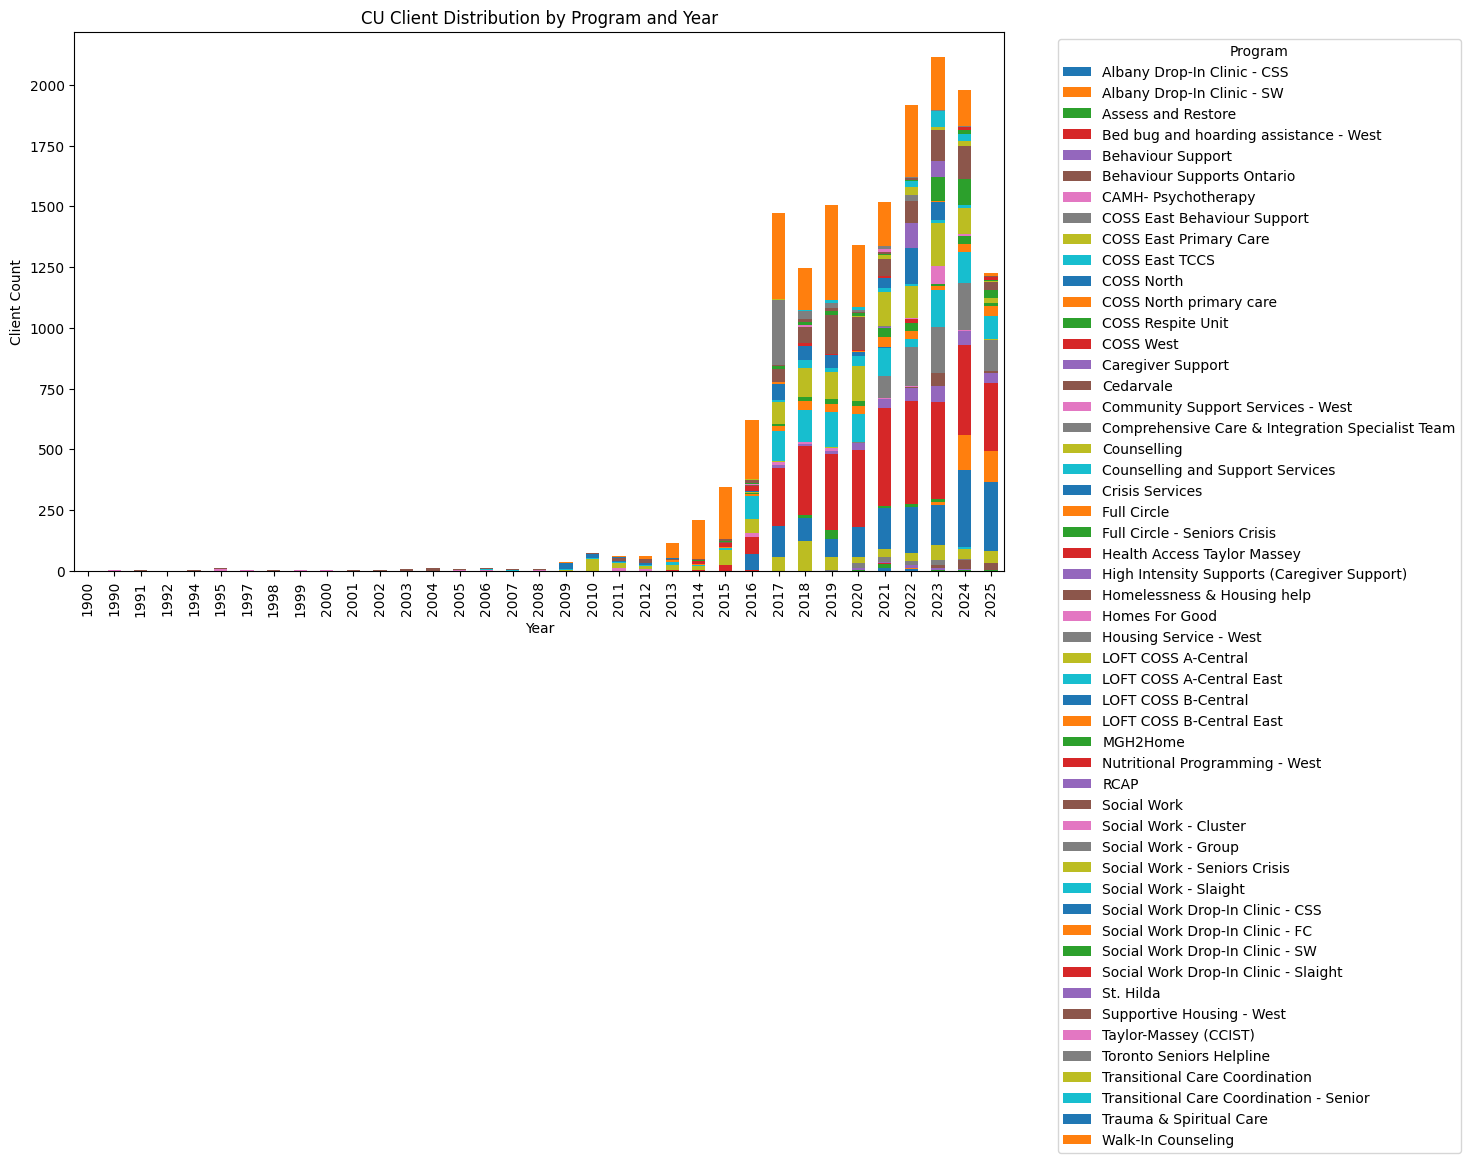

In [35]:
df_CU_health_valid.groupby(['Creation_Year', 'Program_CU']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, figsize=(12,7)
)
plt.title('CU Client Distribution by Program and Year')
plt.xlabel('Year')
plt.ylabel('Client Count')
plt.legend(title='Program', bbox_to_anchor=(1.05, 1))
plt.show()


### Heatmap to explore patterns across programs and years together
(2015 - 2025)

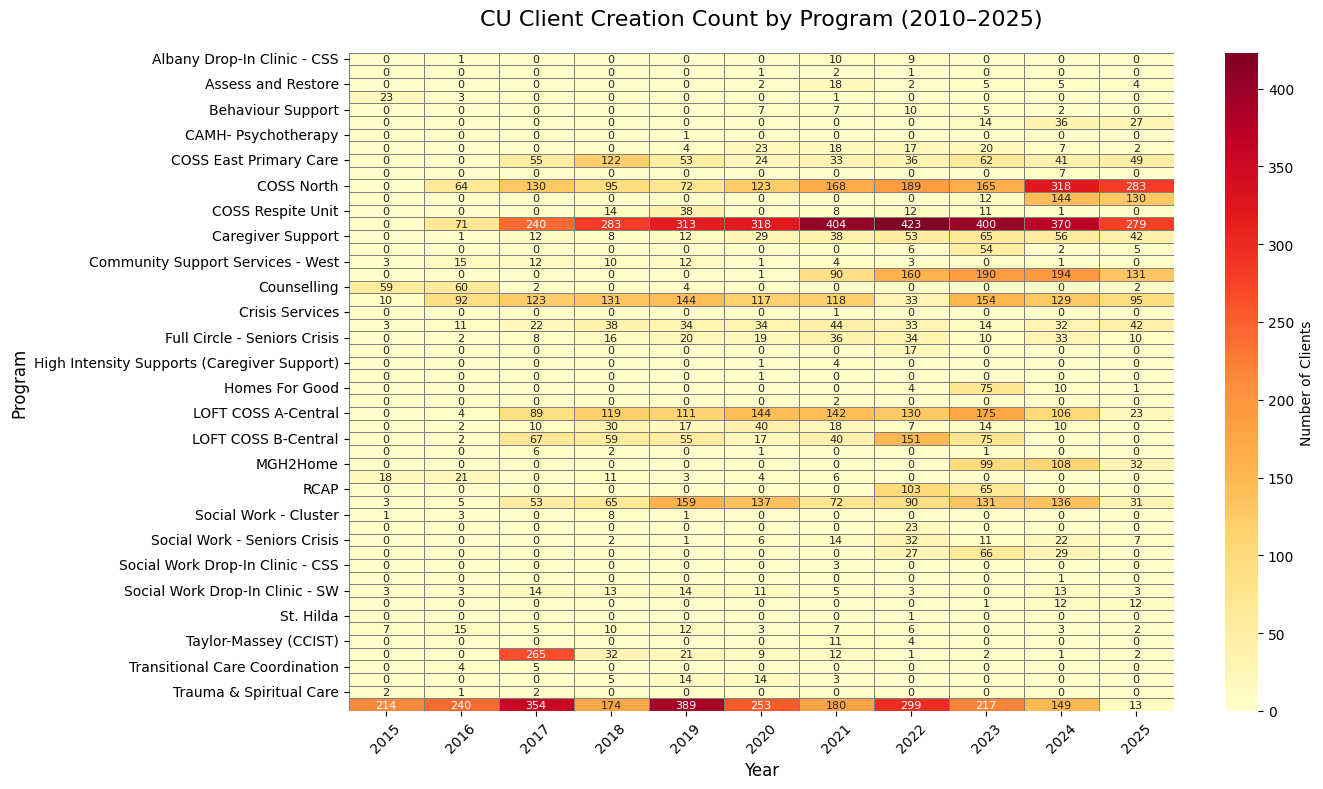

In [37]:
import seaborn as sns

# Create heatmap data: pivot table of programs vs years
heatmap_data = pd.pivot_table(
    df_CU_health_valid,
    values='Unique Record ID',
    index='Program_CU',
    columns='Creation_Year',
    aggfunc='count',
    fill_value=0
)

# Filter years between 2015 and 2025
filtered_cols = [col for col in heatmap_data.columns if 2015 <= col <= 2025]
heatmap_trimmed = heatmap_data[filtered_cols]

# Create a cleaner heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_trimmed,
    cmap='YlOrRd',      
    annot=True, fmt='d',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Clients'},
    annot_kws={'size': 8}
)

plt.title('CU Client Creation Count by Program (2010–2025)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Program', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Top 10 Programs

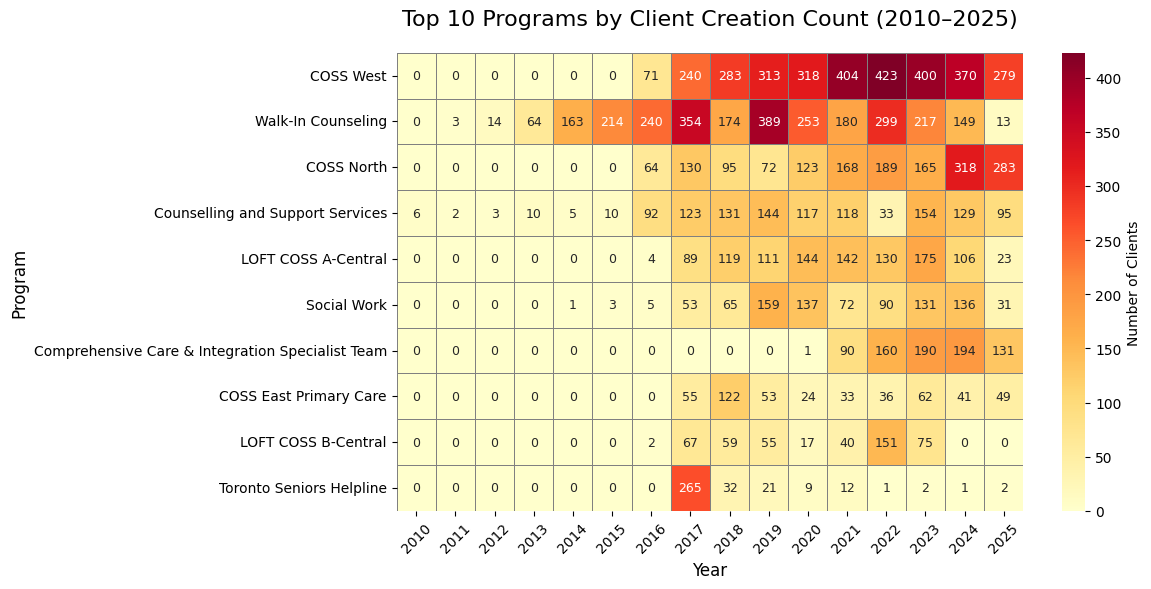

In [38]:
# Sum clients across all years for each program
program_totals = heatmap_data.sum(axis=1)

# Get top 10 programs
top10_programs = program_totals.nlargest(10).index

# Filter dataset to top 10 programs and years 2010–2025
filtered_cols = [col for col in heatmap_data.columns if 2010 <= col <= 2025]
heatmap_top10 = heatmap_data.loc[top10_programs, filtered_cols]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_top10,
    cmap='YlOrRd',
    annot=True, fmt='d',
    linewidths=0.4,
    linecolor='gray',
    cbar_kws={'label': 'Number of Clients'},
    annot_kws={'size': 9}
)

plt.title('Top 10 Programs by Client Creation Count (2010–2025)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Program', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Data Preparation for TR Health

### Data Cleaning

In [39]:
# Drop exact duplicates (same row repeated)
df_TR_health_valid.drop_duplicates(inplace=True)

# Strip whitespace from column names and strings
df_TR_health_valid.columns = df_TR_health_valid.columns.str.strip()
df_TR_health_valid = df_TR_health_valid.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

# Handle missing values (example: fill or drop)
missing_summary = df_TR_health_valid.isna().sum().sort_values(ascending=False)
print(missing_summary.head(20))


/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/511086496.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_TR_health_valid = df_TR_health_valid.applymap(


Wheelchair_YD                     10908
Scooter_YD                        10908
Relationship To Main Tenant_YD    10908
Person with Disabilites_YD        10908
Vision Impaired_YD                10908
Hearing Impaired_YD               10908
Mobility Issues_YD                10908
Walker_YD                         10908
Accessibility Requirements_YD     10908
Property Name_YD                  10908
Fire & Ambulance Assistance_YD    10908
Newcommer_YD                      10908
Status in Canada_YD               10908
Car Model_YD                      10908
City_CC                           10908
Parking Spot Number_YD            10908
Current Service Status_CC         10908
DTLASTMODIFIED_YD                 10908
DTLEASETO_YD                      10908
DTNOTICE_YD                       10908
dtype: int64


### Data Trasnformation

In [40]:
df_TR_health_valid['DischargeDateY-M-D_TR'] = pd.to_datetime(
    df_TR_health_valid['DischargeDateY-M-D_TR'], errors='coerce'
)

df_TR_health_valid['Discharge_Year'] = df_TR_health_valid['DischargeDateY-M-D_TR'].dt.year
df_TR_health_valid['Discharge_Month'] = df_TR_health_valid['DischargeDateY-M-D_TR'].dt.month

print(df_TR_health_valid[['DischargeDateY-M-D_TR', 'Discharge_Year', 'Discharge_Month']].head())


       DischargeDateY-M-D_TR  Discharge_Year  Discharge_Month
132990            2005-05-09            2005                5
132991            2005-05-09            2005                5
132992            2005-09-12            2005                9
132993            2005-09-08            2005                9
132994            2005-09-08            2005                9


### Data Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = df_TR_health_valid.select_dtypes(include='object').columns

# Label encode each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_TR_health_valid[col] = le.fit_transform(df_TR_health_valid[col].astype(str))


### Data Normalization

In [42]:
# Select numeric columns
num_cols = df_TR_health_valid.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df_TR_health_valid[num_cols] = scaler.fit_transform(df_TR_health_valid[num_cols])

/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


### Outlier Detection

In [43]:
Q1 = df_TR_health_valid[num_cols].quantile(0.25)
Q3 = df_TR_health_valid[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = ((df_TR_health_valid[num_cols] < (Q1 - 1.5 * IQR)) | (df_TR_health_valid[num_cols] > (Q3 + 1.5 * IQR)))
outliers = outlier_mask.sum().sort_values(ascending=False)
print("Outliers per column:\n", outliers[outliers > 0])


Outliers per column:
 ClientAddressCity_TR    2136
Citizenship_TR          1759
Year of Birth            617
Sex                      185
Marital Status            78
Home Province Code        21
Encounter Status_TR       16
dtype: int64


### Outlier Removal

In [44]:
# Remove rows with outliers in any numeric column
df_TR_health_clean = df_TR_health_valid[~((df_TR_health_valid[num_cols] < (Q1 - 1.5 * IQR)) | (df_TR_health_valid[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Outliers removed. Clean shape:", df_TR_health_clean.shape)

Outliers removed. Clean shape: (7105, 190)


### Group Clients by Year

In [45]:
clients_per_year = df_TR_health_clean.groupby('Discharge_Year').size().reset_index(name='Client_Count')
print(clients_per_year)

    Discharge_Year  Client_Count
0             2005           458
1             2006           601
2             2007           591
3             2008           442
4             2009           447
5             2010           387
6             2011           405
7             2012           295
8             2013           401
9             2014           394
10            2015           378
11            2016           353
12            2017           412
13            2018           687
14            2019           536
15            2020           148
16            2021            90
17            2022            48
18            2023            10
19            2024            13
20            2025             9


### Visualize the number of clients per year

/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/4237433128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clients_per_year.index, y=clients_per_year.values, palette='crest')


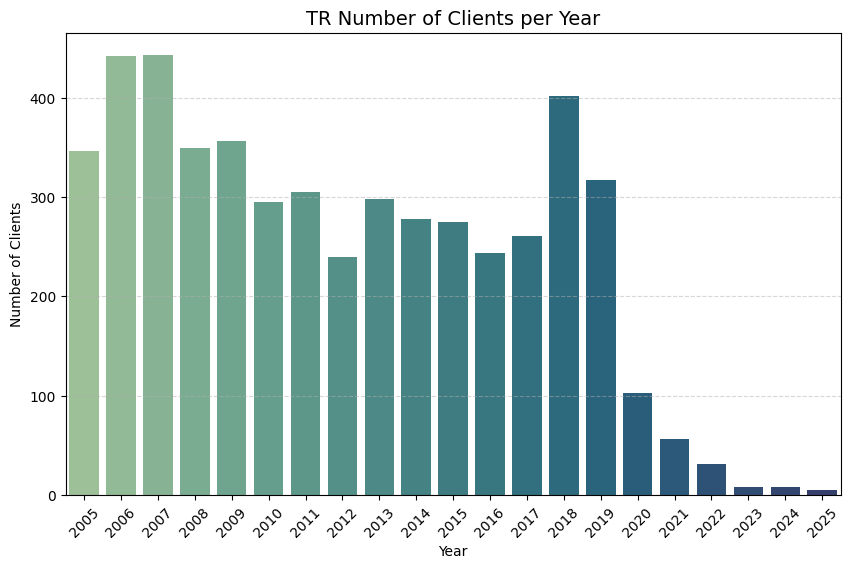

In [46]:
clients_per_year = df_TR_health_clean.groupby('Discharge_Year')['Unique Record ID'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=clients_per_year.index, y=clients_per_year.values, palette='crest')
plt.title('TR Number of Clients per Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [47]:
df_TR_health_clean['Program Name_TR'] = df_TR_health['Program Name_TR']

/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/1634587014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TR_health_clean['Program Name_TR'] = df_TR_health['Program Name_TR']


### Group by Program and Year


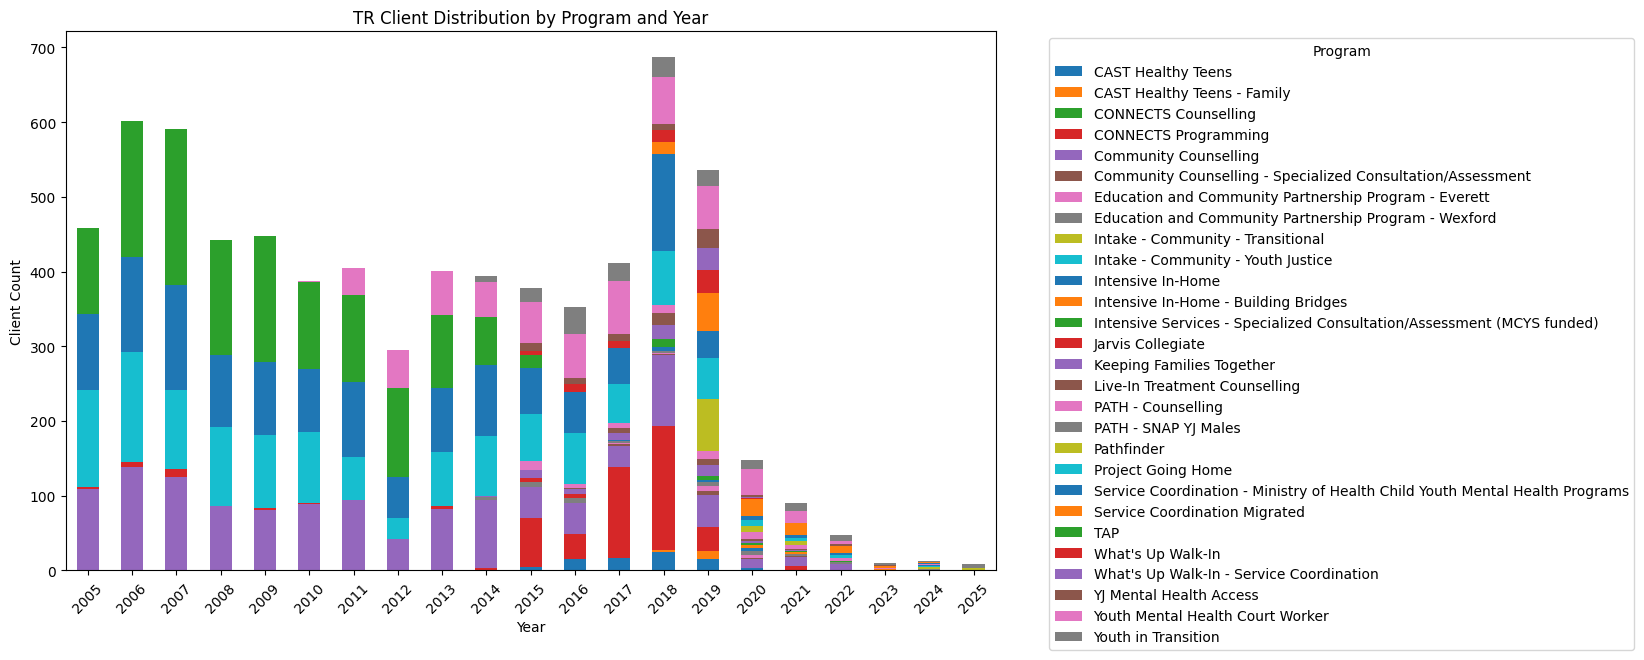

In [48]:
df_TR_health_clean.groupby(['Discharge_Year', 'Program Name_TR']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, figsize=(12,7)
)
plt.title('TR Client Distribution by Program and Year')
plt.xlabel('Year')
plt.ylabel('Client Count')
plt.xticks(rotation=45)
plt.legend(title='Program', bbox_to_anchor=(1.05, 1))
plt.show()


### Heatmap: Program x Year Activity

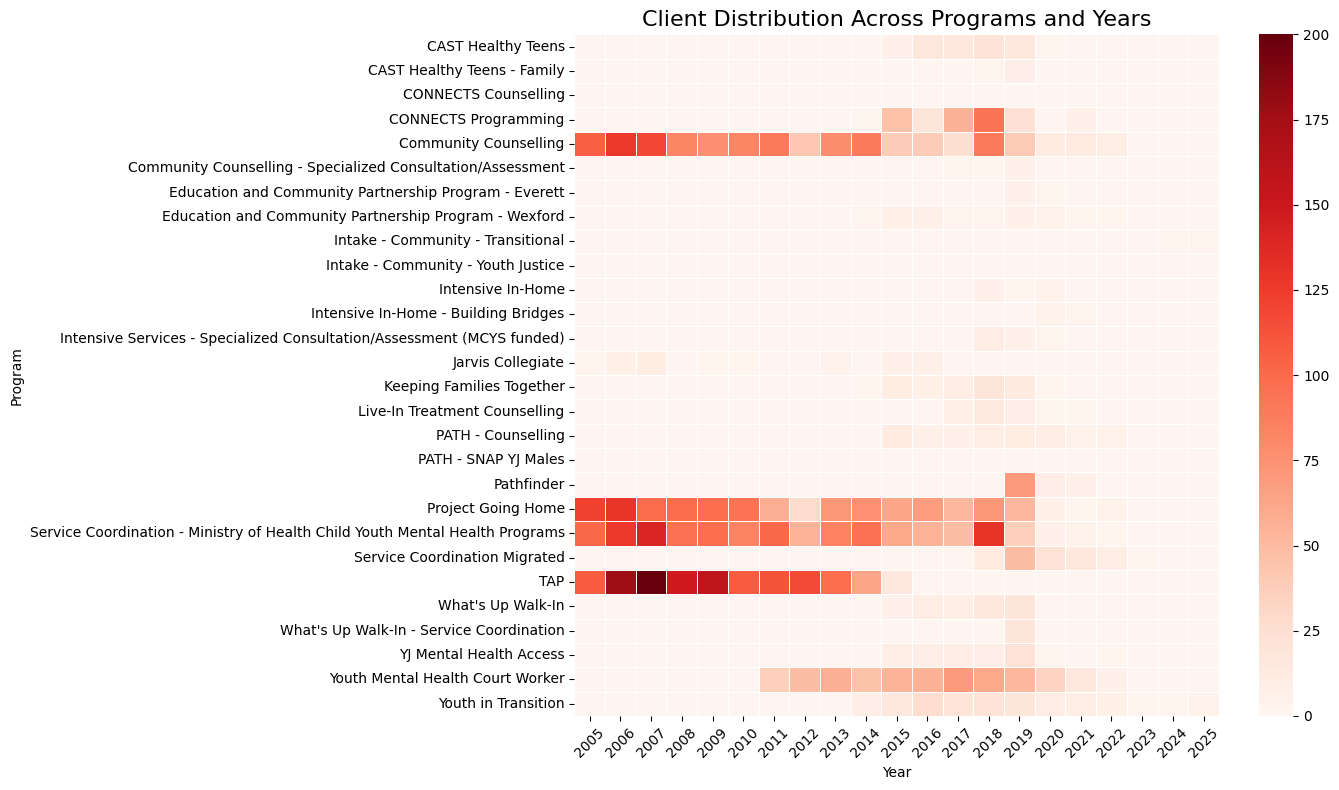

In [49]:
program_year_matrix = (
    df_TR_health_clean.groupby(['Program Name_TR', 'Discharge_Year'])['Unique Record ID']
    .nunique()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 8))
sns.heatmap(program_year_matrix, cmap='Reds', linewidths=0.5)
plt.title('Client Distribution Across Programs and Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# DC Data Preparation for DC Health

### Data Cleaning

In [50]:
# Drop exact duplicates (same row repeated)
df_DC_health.drop_duplicates(inplace=True)

# Strip whitespace from column names and strings
df_DC_health.columns = df_DC_health.columns.str.strip()
df_DC_health = df_DC_health.applymap(
    lambda x: x.strip() if isinstance(x, str) else x
)

# Handle missing values (example: fill or drop)
missing_summary = df_DC_health.isna().sum().sort_values(ascending=False)
print(missing_summary.head(20))


Wheelchair_YD           1209
hbunitsize_HB           1209
Client_ID_Old_HB        1209
CP_ID_HB                1209
pStatus_HB              1209
Status_HB               1209
IntakeStatus_HB         1209
homelessflag_HB         1209
C_Gender_HB             1209
RequestProgram_ID_HB    1209
BPWGroup_HB             1209
CohortGroup_HB          1209
TGRIP_HB                1209
BackgroundCheck_HB      1209
AssignedCC_HB           1209
C_City_ID_HB            1209
C_City_HB               1209
C_Province_ID_HB        1209
hbdate_HB               1209
Property Notes_YD       1209
dtype: int64


/var/folders/3s/j5qq7fvd5jn_tvdy41sw66bm0000gn/T/ipykernel_9318/1709711733.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_DC_health = df_DC_health.applymap(


### Data Transformation

In [51]:
# Convert to datetime first
df_DC_health['program_startdate_DC'] = pd.to_datetime(df_DC_health['program_startdate_DC'], errors='coerce')

# Extract year and month
df_DC_health['year'] = df_DC_health['program_startdate_DC'].dt.year
df_DC_health['month'] = df_DC_health['program_startdate_DC'].dt.month
df_DC_health['month'] = df_DC_health['program_startdate_DC'].dt.month


### Data Encoding

In [52]:
# Select categorical columns
cat_cols = df_CU_health.select_dtypes(include='object').columns

# Label encode each categorical column
le = LabelEncoder()
for col in cat_cols:
    df_CU_health[col] = le.fit_transform(df_CU_health[col].astype(str))

### Data Normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df_DC_health.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_DC_health[numeric_cols] = scaler.fit_transform(df_DC_health[numeric_cols])


/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/sopheaktralean/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


### Outlier Detection

In [54]:
Q1 = df_DC_health[numeric_cols].quantile(0.25)
Q3 = df_DC_health[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_DC_health[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (df_DC_health[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:")
print(outliers)


Outliers per column:
Year of Birth                  37
statecode_DC                    0
mir_workwithanyemployer_DC      0
mir_looking_for_work_DC       156
crmd_canadianexperience_DC     38
                             ... 
ClientAddressCity_TR            0
Citizenship_TR                  0
Program Name_TR                 0
DischargeDateY-M-D_TR           0
Encounter Status_TR             0
Length: 127, dtype: int64


### Outlier Removing

In [56]:
# Keep rows that are *not* outliers for all numeric columns
df_DC_health_clean = df_DC_health[
    ~((df_DC_health[numeric_cols] < (Q1 - 1.5 * IQR)) |
      (df_DC_health[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
].copy()

print("Before removing outliers:", df_DC_health.shape)
print("After removing outliers:", df_DC_health_clean.shape)


Before removing outliers: (1209, 190)
After removing outliers: (953, 190)


### Group clients by year

In [62]:
clients_per_year = df_DC_health_clean['year'].value_counts().sort_index()
print(clients_per_year)

year
2024    460
2025    493
Name: count, dtype: int64


### Visualize  the number of clients per year 

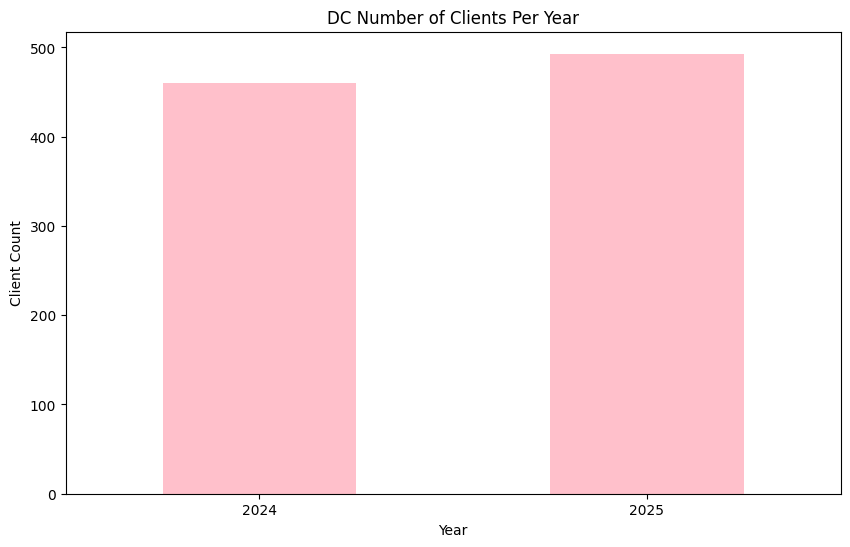

In [63]:
clients_per_year.plot(kind='bar', figsize=(10,6), color='pink')
plt.title('DC Number of Clients Per Year')
plt.xlabel('Year')
plt.ylabel('Client Count')
plt.xticks(rotation=0)
plt.show()

### Visualize by program per year

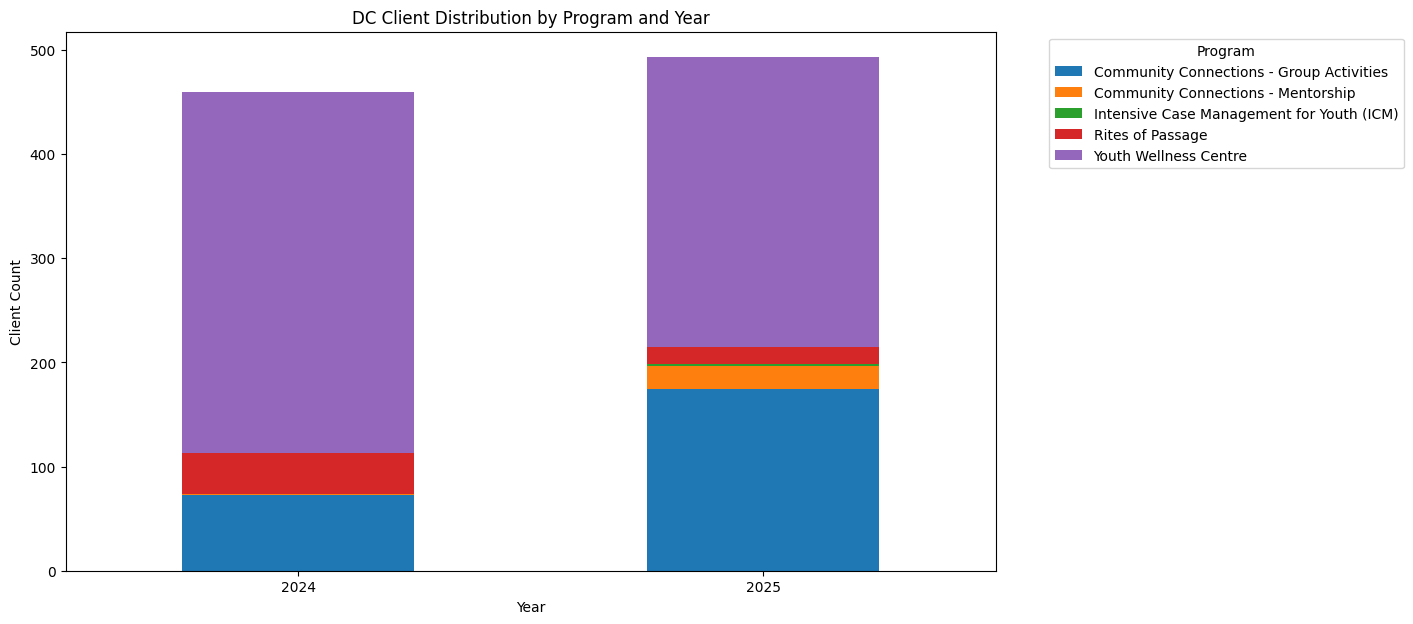

In [64]:
df_DC_health_clean.groupby(['year', 'program_name_DC']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, figsize=(12,7)
)
plt.title('DC Client Distribution by Program and Year')
plt.xlabel('Year')
plt.ylabel('Client Count')
plt.xticks(rotation=0)
plt.legend(title='Program', bbox_to_anchor=(1.05, 1))
plt.show()

### Visualize as a heatmap

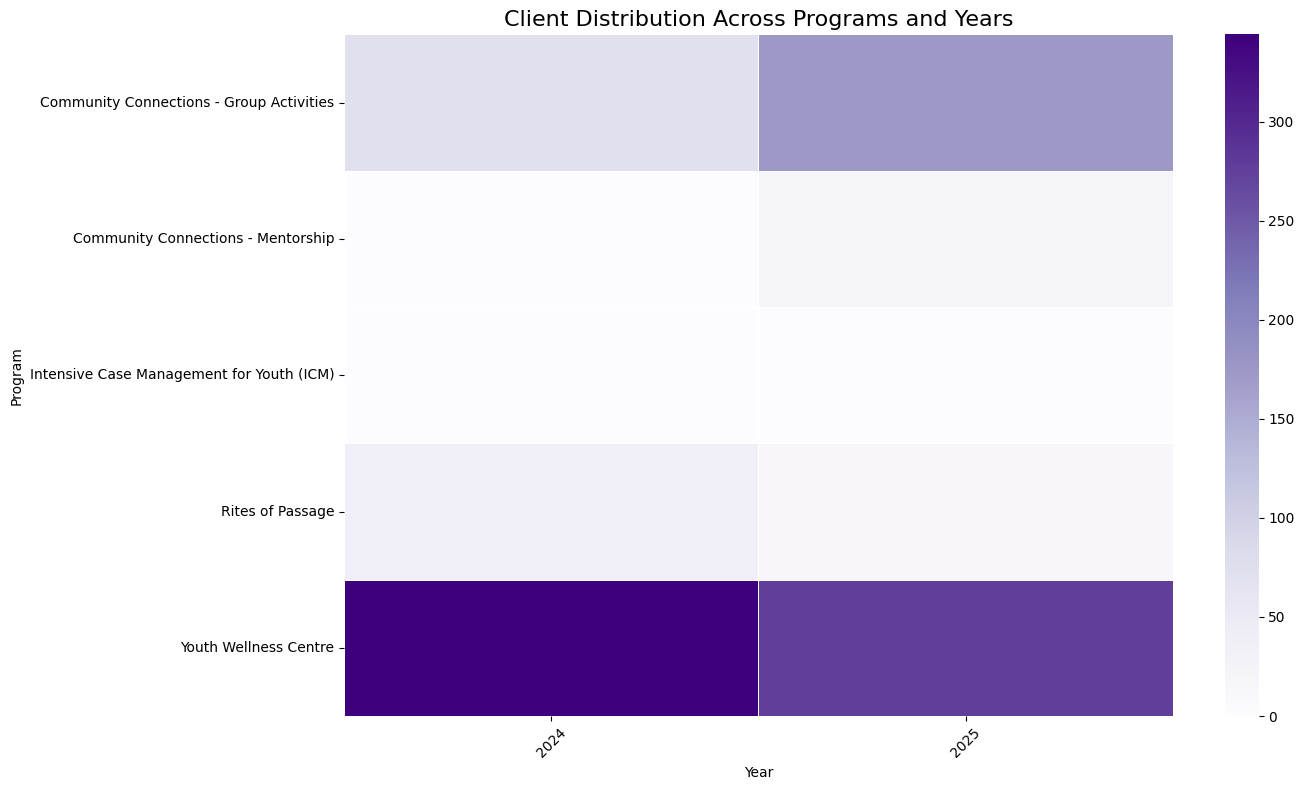

In [65]:
program_year_matrix = (
    df_DC_health_clean.groupby(['program_name_DC', 'year'])['Unique Record ID']
    .nunique()
    .unstack(fill_value=0)
)

plt.figure(figsize=(14, 8))
sns.heatmap(program_year_matrix, cmap='Purples', linewidths=0.5)
plt.title('Client Distribution Across Programs and Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Save all dataframe to csv

In [66]:
# Save dataframe to CSV
df_CU_health_valid.to_csv('../data/community-mental-health/clean_CU_health.csv', index=False)
df_TR_health_clean.to_csv('../data/community-mental-health/clean_TR_health.csv', index=False)
df_DC_health_clean.to_csv('../data/community-mental-health/clean_DC_health.csv', index=False)